In [350]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from scipy.stats import norm
import netCDF4 as n4
import xarray
from scipy.interpolate import griddata
%run define.ipynb
from scipy.stats import linregress
import scipy.stats as stats

In [351]:
jmx=101; #102
delx = 2.0/jmx;
x = np.arange(-1.0+delx/2,1.0,delx)
print(len(x))
phi = 180/np.pi*np.arcsin(x)
mask = [1,0,3,5,6]

101


In [352]:
data_completed = io.loadmat('CMIP5_LGM_Rf_B.mat')
T_ctrl_input = data_completed['T_ctrl']
Rf_list = data_completed['Rf_list']
B_list = data_completed['B_list']
G_list = data_completed['divH_pert']
pert_E_m_P_list = data_completed['pert_E_m_P_list']
T_pert_980 = (np.array(data_completed['T925_pert'])+np.array(data_completed['TS_pert']))/2
divF_pert = data_completed['divF_pert']

In [353]:
T_pert_MEBM = []
E_m_P_pert_MEBM = []
divF_pert_MEBM = []
for i in range(7):
    T_ctrl, T_pert, divF_ctrl, divF_pert, E_m_P_ctrl, E_m_P_pert = operate(Rf_list[i]+G_list[i], T_ctrl_input[i], B_list[i], G_list[i])
    T_pert_MEBM.append(T_pert)
    E_m_P_pert_MEBM.append(E_m_P_pert)
    divF_pert_MEBM.append(divF_pert)

0.3333248686466214
-0.7246629526285757
-1.5167387097658298
-2.1251212780927626
-2.596539976454073
-2.963068810609634
-3.24847572751585
-3.4708923208360885
-3.644306054944109
-3.7795588544530223
-3.8850742236836573
-3.9674055978525398
-4.031656054801623
-4.081801811559743
-4.120942510212826
-4.15149532114498
-4.175345721119497
-4.193964756081419
-4.2085003200452
-4.219848256205503
-4.2287077697322655
-4.235624631334444
-4.241024872246935
-4.24524106975751
-4.248532856475106
-4.25110292502658
-4.253109518974649
-4.254676182262373
-4.255899369401914
-4.256854386130197
-4.257600026990066
-4.258182195782716
-4.258636732042985
-4.2589916177029465
-4.2592686998874
-4.259485035958136
-4.259653943644731
-4.259785820930421
-4.2598887861787285
-4.259969177914965
-4.260031945034193
-4.260080951459453
-4.260119214007026
-4.260149088102491
-4.260172412780895
-4.260190623897652
-4.260204842519492
-4.260215943937019
-4.260224611547308
-4.260231378923535
-4.260236662661486
-4.260240788024979
-4.2602440

-3.8714032694107297
-3.871403282548665
-3.8714032947689536
-3.871403306135592
-3.8714033167082444
-3.871403326542398
-3.8714033356896342
-3.871403344197895
-3.8714033521117712
-3.871403359472904
-3.871403366319801
-3.871403372688435
-3.8714033786121584
-3.8714033841221074
-3.871403389247217
-3.8714033940142785
-3.8714033984484555
-3.8714034025728448
-3.871403406409108
-3.8714034099774106
-3.8714034132963002
-3.871403416383547
-3.8714034192551066
-3.87140342192597
-3.87140342441045
-3.871403426721339
-3.871403428870842
-3.871403430870171
-3.87140343272976
-3.871403434459457
-3.871403436068462
-3.871403437565181
-3.8714034389572625
-3.8714034402519455
-3.871403441456323
-3.8714034425766064
-3.8714034436186218
-3.871403444587834
-3.8714034454892396
-3.8714034463277853
-3.871403447107846
-3.8714034478333823
-3.8714034485082
-3.871403449135928
-3.871403449719786
-3.871403450262763
-3.8714034507679984
-3.8714034512380366
-3.8714034516750884
-3.8714034520816134
-3.8714034524597647
-3.87140345

-4.666537455481576
-4.666538776256571
-4.666539885164686
-4.666540816191718
-4.666541597871757
-4.666542254161701
-4.666542805175518
-4.666543267800647
-4.666543656215609
-4.666543982324526
-4.666544256121971
-4.666544485999285
-4.666544679001728
-4.666544841044434
-4.66654497709368
-4.666545091319097
-4.6665451872214625
-4.666545267739986
-4.666545335342399
-4.666545392100587
-4.66654543975406
-4.666545479763326
-4.666545513354576
-4.6665455415573405
-4.666545565235991
-4.666545585116221
-4.666545601807344
-4.666545615820939
-4.666545627586544
-4.666545637464682
-4.666545645758266
-4.666545652721349
-4.666545658567439
-4.6665456634757385
-4.666545667596707
-4.666545671056589
-4.666545673961462
-4.666545676400243
-4.666545678447877
-4.666545680167186
-4.666545681610651
-4.666545682822445
-4.666545683840098
-4.66654568469458
-4.666545685411836
-4.666545686013866
-4.666545686519537
-4.666545686944349
-4.66654568730104
-4.666545687600361
-4.666545687851782
-4.6665456880629455
-4.666545688

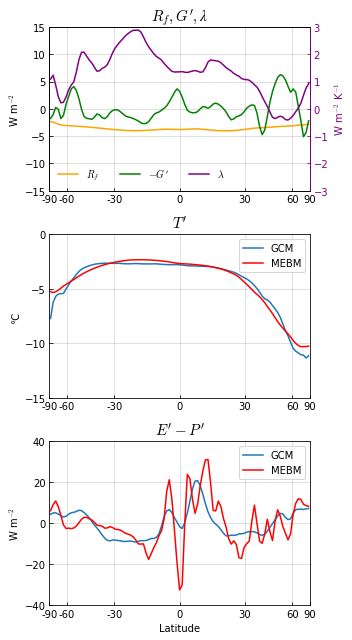

In [354]:
# create the figure and subplots
plt.ioff()
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(5, 9))
plt.rcParams['mathtext.fontset'] = 'cm'

# create each subplot
axis[0].plot(x, np.mean(data_completed['Rf_list'][mask], axis=0), label = r'$R_f$', color = 'orange')
axis[0].plot(x, -np.mean(data_completed['divH_pert'][mask], axis=0), label = r"$- G'$", color = 'green')
axis[0].plot([-3,-2],[-3,-2], label = '$\lambda$', color = 'purple')

axis[0].set_title(r"$R_f, G', λ$", fontsize = 15)
axis[0].set_ylim(-15,15)
axis[0].set_xlim(-1,1)
axis[0].legend(ncol=3,frameon=False, loc='lower left')
axis[0].set_ylabel(r"W m$^{-2}$")
twin1 = axis[0].twinx()
twin1.plot(x, np.mean(data_completed['B_list'][mask], axis=0), label = 'λ', color = 'purple')
twin1.set_ylabel(r"W m$^{-2}$ K$^{-1}$")
twin1.spines["right"].set_color('purple')
twin1.tick_params(axis='y',direction='in', colors = 'purple')
twin1.yaxis.label.set_color('purple')
twin1.set_ylim(-3,3)
#axis[0].grid(alpha = 0.5)

axis[1].plot(x, np.mean(T_pert_980[mask], axis=0), label = 'GCM')
axis[1].plot(x, np.mean(np.array(T_pert_MEBM)[mask], axis=0), label = 'MEBM', color = 'red')
axis[1].set_ylim(-15,0)
axis[1].set_title(r"$T'$", fontsize = 15)
axis[1].set_ylabel(r"℃")
axis[1].set_yticks([-15,-10,-5,0])
axis[1].legend()
axis[2].plot(x, np.mean(data_completed['pert_E_m_P_list'][mask], axis=0)*(2.45e6*1e3/(np.pi*1e7)), label = 'GCM')
axis[2].plot(x, np.mean(np.array(E_m_P_pert_MEBM)[mask], axis=0)*(2.45e6*1e3/(np.pi*1e7)), label = 'MEBM', color = 'red')
axis[2].set_ylim(-40,40)
axis[2].set_title(r"$E' - P'$", fontsize = 15)
axis[2].set_ylabel(r"W m$^{-2}$")
axis[2].set_yticks([-40,-20,0,20,40])
axis[2].legend()


# add a main title to the figure
# fig.suptitle('Trigonometric Functions')
# show the figure
for ax in axis:
    # ax.grid(True,  linestyle='dotted', color='lightgrey')
    ax.set_xlim(-1,1)
    ax.set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])
    ax.set_xticklabels(['-90', '-60','-30','0', '30','60', '90'])
    ax.grid(alpha = 0.5)
    ax.tick_params(axis='both',direction='in')
axis[2].set_xlabel('Latitude')
fig.tight_layout()
fig.savefig('Rf_G_lambda.png',dpi=300)
plt.show()

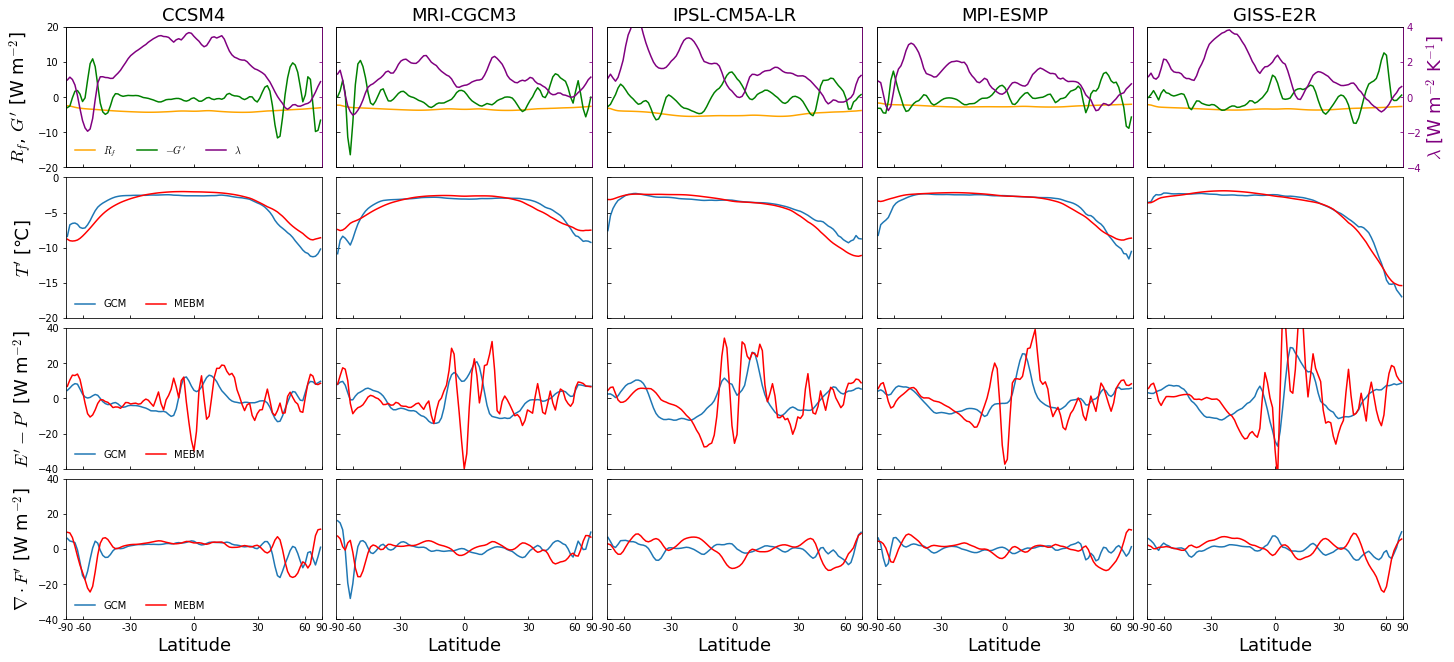

In [355]:
plt.ioff()
plt.rcParams['mathtext.fontset'] = 'cm'
fig, axis = plt.subplots(nrows=4, ncols=5, figsize=(20, 9))

# [0,0]
axis[0,0].plot(x, data_completed['Rf_list'][mask[0]], label = r'$R_f$', color = 'orange')
axis[0,0].plot(x, -data_completed['divH_pert'][mask[0]], label = r"$- G'$", color = 'green')
axis[0,0].plot([-3,-2],[-3,-2], label = '$\lambda$', color = 'purple')

axis[0,0].set_title("CCSM4", fontsize = 18)
axis[0,0].set_ylim(-20,20)
axis[0,0].set_xlim(-1,1)
axis[0,0].legend(ncol=3,frameon=False, loc='lower left')
axis[0,0].set_ylabel(r"$R_f$, $G' $ [W m$^{-2}$]", fontsize = 18)
twin1 = axis[0,0].twinx()
twin1.plot(x, data_completed['B_list'][mask[0]], label = 'λ', color = 'purple')
#twin1.set_ylabel(r"W m$^{-2}$ K$^{-1}$")
twin1.spines["right"].set_color('purple')
twin1.tick_params(axis='y',direction='in', colors = 'purple', labelright=False)
axis[0,0].tick_params(axis='x',direction='in', labelbottom=False)
axis[0,0].set_yticks([-20,-10,0,10,20])
axis[0,0].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

twin1.yaxis.label.set_color('purple')

twin1.set_ylim(-4,4)

# [0,1]
axis[0,1].plot(x, data_completed['Rf_list'][mask[1]], color = 'orange')
axis[0,1].plot(x, -data_completed['divH_pert'][mask[1]], color = 'green')
axis[0,1].plot([-3,-2],[-3,-2], color = 'purple')

axis[0,1].set_title("MRI-CGCM3", fontsize = 18)
axis[0,1].set_ylim(-20,20)
axis[0,1].set_xlim(-1,1)
twin1 = axis[0,1].twinx()
twin1.plot(x, data_completed['B_list'][mask[1]], label = 'λ', color = 'purple')
twin1.spines["right"].set_color('purple')
axis[0,1].tick_params(axis='y',direction='in', labelleft=False)
twin1.tick_params(axis='y',direction='in', colors = 'purple', labelright=False)
axis[0,1].tick_params(axis='x',direction='in', labelbottom=False)
axis[0,1].set_yticks([-20,-10,0,10,20])
axis[0,1].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

twin1.yaxis.label.set_color('purple')
twin1.set_ylim(-4,4)

# [0,2]
axis[0,2].plot(x, data_completed['Rf_list'][mask[2]], color = 'orange')
axis[0,2].plot(x, -data_completed['divH_pert'][mask[2]], color = 'green')
axis[0,2].plot([-3,-2],[-3,-2], color = 'purple')

axis[0,2].set_title("IPSL-CM5A-LR", fontsize = 18)
axis[0,2].set_ylim(-20,20)
axis[0,2].set_xlim(-1,1)
twin1 = axis[0,2].twinx()
twin1.plot(x, data_completed['B_list'][mask[2]], label = 'λ', color = 'purple')
twin1.spines["right"].set_color('purple')
axis[0,2].tick_params(axis='y',direction='in', labelleft=False)
twin1.tick_params(axis='y',direction='in', colors = 'purple', labelright=False)
axis[0,2].tick_params(axis='x',direction='in', labelbottom=False)
axis[0,2].set_yticks([-20,-10,0,10,20])
axis[0,2].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

twin1.yaxis.label.set_color('purple')
twin1.set_ylim(-4,4)

# [0,3]
axis[0,3].plot(x, data_completed['Rf_list'][mask[3]], color = 'orange')
axis[0,3].plot(x, -data_completed['divH_pert'][mask[3]], color = 'green')
axis[0,3].plot([-3,-2],[-3,-2], color = 'purple')

axis[0,3].set_title("MPI-ESMP", fontsize = 18)
axis[0,3].set_ylim(-20,20)
axis[0,3].set_xlim(-1,1)
twin1 = axis[0,3].twinx()
twin1.plot(x, data_completed['B_list'][mask[3]], label = 'λ', color = 'purple')
twin1.spines["right"].set_color('purple')
axis[0,3].tick_params(axis='y',direction='in', labelleft=False)
twin1.tick_params(axis='y',direction='in', colors = 'purple', labelright=False)
axis[0,3].tick_params(axis='x',direction='in', labelbottom=False)
axis[0,3].set_yticks([-20,-10,0,10,20])
axis[0,3].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

twin1.yaxis.label.set_color('purple')
twin1.set_ylim(-4,4)

# [0,4]
axis[0,4].plot(x, data_completed['Rf_list'][mask[4]], color = 'orange')
axis[0,4].plot(x, -data_completed['divH_pert'][mask[4]], color = 'green')
axis[0,4].plot([-3,-2],[-3,-2], color = 'purple')

axis[0,4].set_title("GISS-E2R", fontsize = 18)
axis[0,4].set_ylim(-20,20)
axis[0,4].set_xlim(-1,1)
twin1 = axis[0,4].twinx()
twin1.plot(x, data_completed['B_list'][mask[4]], label = 'λ', color = 'purple')
twin1.spines["right"].set_color('purple')
axis[0,4].tick_params(axis='y',direction='in', labelleft=False)
twin1.tick_params(axis='y',direction='in', colors = 'purple')
axis[0,4].tick_params(axis='x',direction='in', labelbottom=False)
axis[0,4].set_yticks([-20,-10,0,10,20])
axis[0,4].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

twin1.yaxis.label.set_color('purple')
twin1.set_ylabel(r"$\lambda $ [W m$^{-2}$ K$^{-1}$]", fontsize = 18)
twin1.set_ylim(-4,4)

# [1,?] #####################################################################

# [1,0]
axis[1,0].plot(x, T_pert_980[mask[0]], label = 'GCM')
axis[1,0].plot(x, T_pert_MEBM[mask[0]], label = 'MEBM', color = 'red')
axis[1,0].set_ylim(-20,0)
axis[1,0].set_xlim(-1,1)
axis[1,0].legend(ncol=2,frameon=False, loc='lower left')
axis[1,0].set_ylabel(r"$T' $ [℃]", fontsize = 18)
axis[1,0].tick_params(axis='x',direction='in', labelbottom=False)
axis[1,0].set_yticks([-20,-15,-10,-5,0])
axis[1,0].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [1,1]
axis[1,1].plot(x, T_pert_980[mask[1]])
axis[1,1].plot(x, T_pert_MEBM[mask[1]], color = 'red')
axis[1,1].set_ylim(-20,0)
axis[1,1].set_xlim(-1,1)
axis[1,1].tick_params(axis='x',direction='in', labelbottom=False)
axis[1,1].tick_params(axis='y',direction='in', labelleft=False)
axis[1,1].set_yticks([-20,-15,-10,-5,0])
axis[1,1].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [1,2]
axis[1,2].plot(x, T_pert_980[mask[2]])
axis[1,2].plot(x, T_pert_MEBM[mask[2]], color = 'red')
axis[1,2].set_ylim(-20,0)
axis[1,2].set_xlim(-1,1)
axis[1,2].tick_params(axis='x',direction='in', labelbottom=False)
axis[1,2].tick_params(axis='y',direction='in', labelleft=False)
axis[1,2].set_yticks([-20,-15,-10,-5,0])
axis[1,2].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [1,3]
axis[1,3].plot(x, T_pert_980[mask[3]])
axis[1,3].plot(x, T_pert_MEBM[mask[3]], color = 'red')
axis[1,3].set_ylim(-20,0)
axis[1,3].set_xlim(-1,1)
axis[1,3].tick_params(axis='x',direction='in', labelbottom=False)
axis[1,3].tick_params(axis='y',direction='in', labelleft=False)
axis[1,3].set_yticks([-20,-15,-10,-5,0])
axis[1,3].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [1,4]
axis[1,4].plot(x, T_pert_980[mask[4]])
axis[1,4].plot(x, T_pert_MEBM[mask[4]], color = 'red')
axis[1,4].set_ylim(-20,0)
axis[1,4].set_xlim(-1,1)
axis[1,4].tick_params(axis='x',direction='in', labelbottom=False)
axis[1,4].tick_params(axis='y',direction='in', labelleft=False)
axis[1,4].set_yticks([-20,-15,-10,-5,0])
axis[1,4].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])


# [2,0]
axis[2,0].plot(x, data_completed['pert_E_m_P_list'][mask[0]]*(2.45e6*1e3/(np.pi*1e7)), label = 'GCM')
axis[2,0].plot(x, E_m_P_pert_MEBM[mask[0]]*(2.45e6*1e3/(np.pi*1e7)), label = 'MEBM', color = 'red')
axis[2,0].set_ylim(-40,40)
axis[2,0].set_xlim(-1,1)
axis[2,0].legend(ncol=2,frameon=False, loc='lower left')
axis[2,0].set_ylabel(r"$E'-P' $ [W m$^{-2}$]", fontsize = 18)
axis[2,0].tick_params(axis='x',direction='in', labelbottom=False)
axis[2,0].set_yticks([-40,-20,0,20,40])
axis[2,0].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [2,1]
axis[2,1].plot(x, data_completed['pert_E_m_P_list'][mask[1]]*(2.45e6*1e3/(np.pi*1e7)))
axis[2,1].plot(x, E_m_P_pert_MEBM[mask[1]]*(2.45e6*1e3/(np.pi*1e7)), color = 'red')
axis[2,1].set_ylim(-40,40)
axis[2,1].set_xlim(-1,1)
axis[2,1].tick_params(axis='x',direction='in', labelbottom=False)
axis[2,1].tick_params(axis='y',direction='in', labelleft=False)
axis[2,1].set_yticks([-40,-20,0,20,40])
axis[2,1].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [2,2]
axis[2,2].plot(x, data_completed['pert_E_m_P_list'][mask[2]]*(2.45e6*1e3/(np.pi*1e7)))
axis[2,2].plot(x, E_m_P_pert_MEBM[mask[2]]*(2.45e6*1e3/(np.pi*1e7)), color = 'red')
axis[2,2].set_ylim(-40,40)
axis[2,2].set_xlim(-1,1)
axis[2,2].tick_params(axis='x',direction='in', labelbottom=False)
axis[2,2].tick_params(axis='y',direction='in', labelleft=False)
axis[2,2].set_yticks([-40,-20,0,20,40])
axis[2,2].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [2,3]
axis[2,3].plot(x, data_completed['pert_E_m_P_list'][mask[3]]*(2.45e6*1e3/(np.pi*1e7)))
axis[2,3].plot(x, E_m_P_pert_MEBM[mask[3]]*(2.45e6*1e3/(np.pi*1e7)), color = 'red')
axis[2,3].set_ylim(-40,40)
axis[2,3].set_xlim(-1,1)
axis[2,3].tick_params(axis='x',direction='in', labelbottom=False)
axis[2,3].tick_params(axis='y',direction='in', labelleft=False)
axis[2,3].set_yticks([-40,-20,0,20,40])
axis[2,3].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

# [2,4]
axis[2,4].plot(x, data_completed['pert_E_m_P_list'][mask[4]]*(2.45e6*1e3/(np.pi*1e7)))
axis[2,4].plot(x, E_m_P_pert_MEBM[mask[4]]*(2.45e6*1e3/(np.pi*1e7)), color = 'red')
axis[2,4].set_ylim(-40,40)
axis[2,4].set_xlim(-1,1)
axis[2,4].tick_params(axis='x',direction='in', labelbottom=False)
axis[2,4].tick_params(axis='y',direction='in', labelleft=False)
axis[2,4].set_yticks([-40,-20,0,20,40])
axis[2,4].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])


# [3,0]
axis[3,0].plot(x, data_completed['divF_pert'][mask[0]], label = 'GCM')
axis[3,0].plot(x, divF_pert_MEBM[mask[0]], label = 'MEBM', color = 'red')
axis[3,0].set_ylim(-40,40)
axis[3,0].set_xlim(-1,1)
axis[3,0].legend(ncol=2,frameon=False, loc='lower left')
axis[3,0].set_ylabel(r"$\nabla \cdot {F'} $ [W m$^{-2}$]", fontsize = 18)
axis[3,0].tick_params(axis='x',direction='in')
axis[3,0].set_yticks([-40,-20,0,20,40])
axis[3,0].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])
axis[3,0].set_xticklabels(['-90', '-60','-30','0', '30','60', '90'])
axis[3,0].set_xlabel('Latitude', fontsize = 18)

# [3,1]
axis[3,1].plot(x, data_completed['divF_pert'][mask[1]])
axis[3,1].plot(x, divF_pert_MEBM[mask[1]], color = 'red')
axis[3,1].set_ylim(-40,40)
axis[3,1].set_xlim(-1,1)
axis[3,1].tick_params(axis='x',direction='in')
axis[3,1].tick_params(axis='y',direction='in', labelleft=False)
axis[3,1].set_yticks([-40,-20,0,20,40])
axis[3,1].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])
axis[3,1].set_xticklabels(['-90', '-60','-30','0', '30','60', '90'])
axis[3,1].set_xlabel('Latitude', fontsize = 18)
# [3,2]
axis[3,2].plot(x, data_completed['divF_pert'][mask[2]])
axis[3,2].plot(x, divF_pert_MEBM[mask[2]], color = 'red')
axis[3,2].set_ylim(-40,40)
axis[3,2].set_xlim(-1,1)
axis[3,2].tick_params(axis='x',direction='in')
axis[3,2].tick_params(axis='y',direction='in', labelleft=False)
axis[3,2].set_yticks([-40,-20,0,20,40])
axis[3,2].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])
axis[3,2].set_xticklabels(['-90', '-60','-30','0', '30','60', '90'])
axis[3,2].set_xlabel('Latitude', fontsize = 18)

# [3,3]
axis[3,3].plot(x, data_completed['divF_pert'][mask[3]])
axis[3,3].plot(x, divF_pert_MEBM[mask[3]], color = 'red')
axis[3,3].set_ylim(-40,40)
axis[3,3].set_xlim(-1,1)
axis[3,3].tick_params(axis='x',direction='in')
axis[3,3].tick_params(axis='y',direction='in', labelleft=False)
axis[3,3].set_yticks([-40,-20,0,20,40])
axis[3,3].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])
axis[3,3].set_xticklabels(['-90', '-60','-30','0', '30','60', '90'])
axis[3,3].set_xlabel('Latitude', fontsize = 18)

# [3,4]
axis[3,4].plot(x, data_completed['divF_pert'][mask[4]])
axis[3,4].plot(x, divF_pert_MEBM[mask[4]], color = 'red')
axis[3,4].set_ylim(-40,40)
axis[3,4].set_xlim(-1,1)
axis[3,4].tick_params(axis='x',direction='in')
axis[3,4].tick_params(axis='y',direction='in', labelleft=False)
axis[3,4].set_yticks([-40,-20,0,20,40])
axis[3,4].set_xticks([-1,-0.866,-0.5,0,0.5,0.866,1])

axis[3,4].set_xticklabels(['-90', '-60','-30','0', '30','60', '90'])
axis[3,4].set_xlabel('Latitude', fontsize = 18)
fig.tight_layout(pad=0, w_pad=0, h_pad=0)

fig.savefig('GCM_MEBM.png',dpi=300)
plt.show()

In [316]:
#2

In [344]:
from scipy.io import savemat
mdic = {"T_pert_MEBM":T_pert_MEBM,"E_m_P_pert_MEBM":E_m_P_pert_MEBM, "Rf_mean":np.mean(data_completed['Rf_list'][mask], axis=0), "G_mean":np.mean(data_completed['divH_pert'][mask], axis=0), "B_mean":np.mean(data_completed['B_list'][mask], axis=0), "T_ctrl_mean":np.mean(T_ctrl_input[mask], axis=0)}
savemat("MEBM_output_Rf_B.mat", mdic)

In [346]:
print(np.mean(np.mean(data_completed['B_list'][mask])))

1.2923402633544125
